<a href="https://colab.research.google.com/github/MagoDoug/ProjetoFiap/blob/main/Tech_Challenge_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise de Retenção (Cohort)

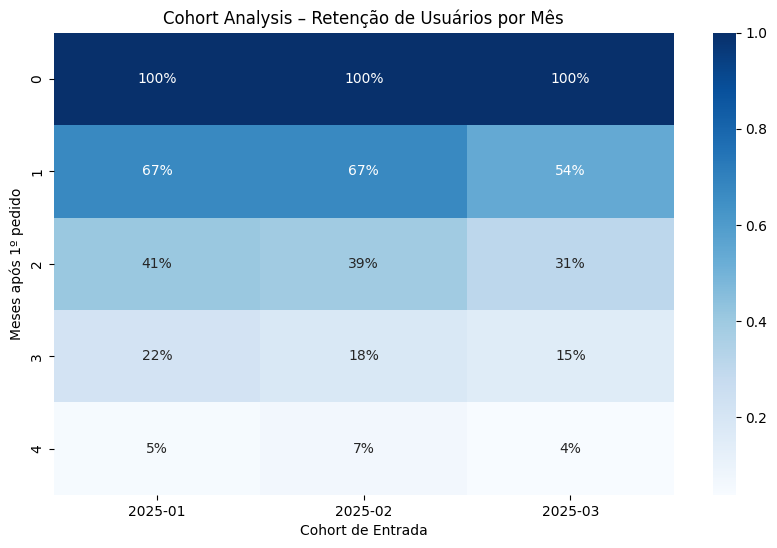

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
df = pd.read_csv("cohort_data_retencao.csv")
df['order_month'] = pd.to_datetime(df['order_date']).dt.to_period('M')
df['cohort_month'] = df.groupby('user_id')['order_month'].transform('min')
df['cohort_index'] = (df['order_month'] - df['cohort_month']).apply(lambda x: x.n)

# Tabela de retenção
cohort_data = df.groupby(['cohort_month', 'cohort_index'])['user_id'].nunique().unstack(0).fillna(0)
cohort_sizes = cohort_data.loc[0]
retention = cohort_data.divide(cohort_sizes, axis=1)

# Visualização
plt.figure(figsize=(10, 6))
sns.heatmap(retention, annot=True, fmt=".0%", cmap="Blues")
plt.title('Cohort Analysis – Retenção de Usuários por Mês')
plt.ylabel('Meses após 1º pedido')
plt.xlabel('Cohort de Entrada')
plt.show()



Funil de Conversão

,Etapa,Usuários,Taxa Conversão (%)
0,Download,10000,100.0
1,Cadastro,8200,82.0
2,Pedido,5330,65.0
3,Entrega,4850,91.0


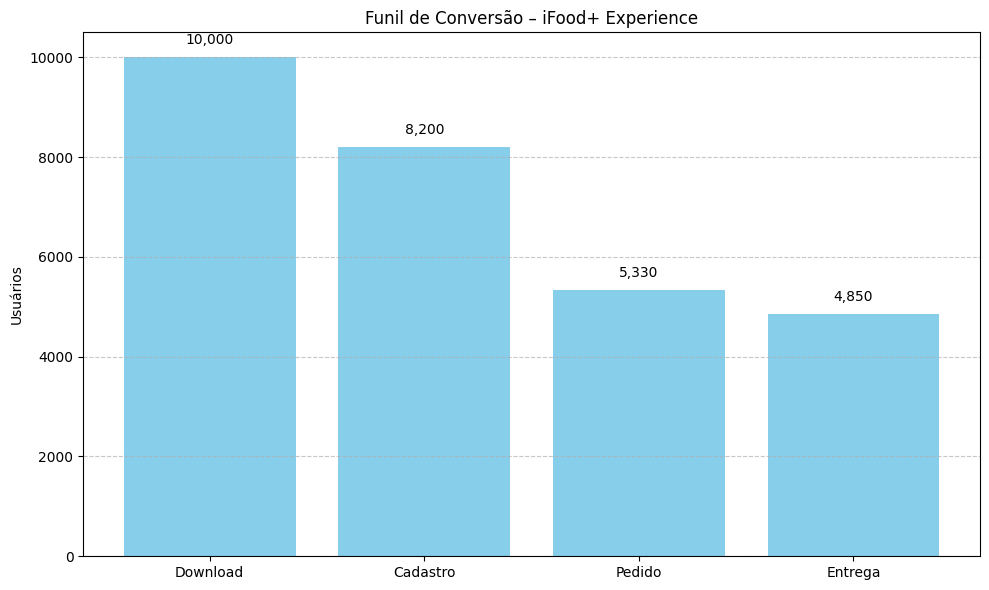

In [3]:
# Carregar o dataset gerado
df = pd.read_csv("user_journey_python.csv", parse_dates=[
    "data_download", "data_cadastro", "data_pedido", "data_entrega"
])

# Cálculo das métricas do funil
total_downloads = df['user_id'].nunique()
total_cadastros = df['data_cadastro'].notnull().sum()
total_pedidos = df['data_pedido'].notnull().sum()
total_entregas = df['data_entrega'].notnull().sum()

# Montar o funil
funil = pd.DataFrame({
    'Etapa': ['Download', 'Cadastro', 'Pedido', 'Entrega'],
    'Usuários': [total_downloads, total_cadastros, total_pedidos, total_entregas],
    'Taxa Conversão (%)': [
        100,
        round((total_cadastros / total_downloads) * 100, 1),
        round((total_pedidos / total_cadastros) * 100, 1),
        round((total_entregas / total_pedidos) * 100, 1)
    ]
})

import matplotlib.pyplot as plt

# Visualização em gráfico de funil
plt.figure(figsize=(10, 6))
plt.bar(funil['Etapa'], funil['Usuários'], color='skyblue')
for i, v in enumerate(funil['Usuários']):
    plt.text(i, v + 200, f'{v:,}', ha='center', va='bottom', fontsize=10)
plt.title('Funil de Conversão – iFood+ Experience')
plt.ylabel('Usuários')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
funil


Engajamento Com Roleta

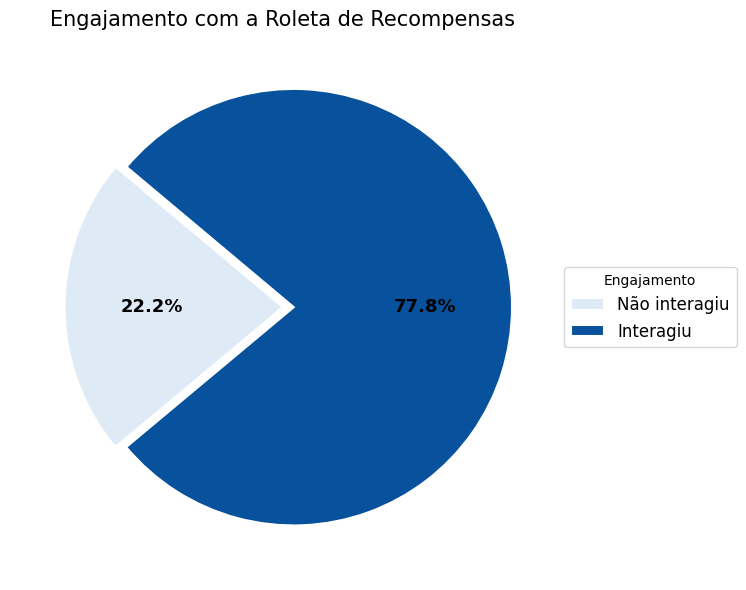

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o CSV
df = pd.read_csv('Engajamento_Roleta.csv')

# Contagem
contagem = df['interagiu_roleta'].value_counts().sort_index()
labels = ['Não interagiu', 'Interagiu']
valores = [contagem[1], contagem[0]]

# Cores no estilo 'Blues'
cores = ['#deebf7', '#08519c']  # tom claro e tom escuro de azul
explode = (0, 0.05)

# Criar o gráfico
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    valores,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=cores,
    explode=explode,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
    textprops={'fontsize': 12}
)

# Legenda à esquerda
ax.legend(wedges, labels, title='Engajamento', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.setp(autotexts, size=13, weight="bold", color='black')
ax.set_title('Engajamento com a Roleta de Recompensas', fontsize=15)
plt.tight_layout()
plt.show()
